In [57]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings("ignore")

In [59]:
df = pd.read_csv("/content/gdrive/MyDrive/Projects/ML Projects/Heart_Disease_Prediction/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [60]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [61]:
count = dict(df.target.value_counts())
count

{0: 138, 1: 165}

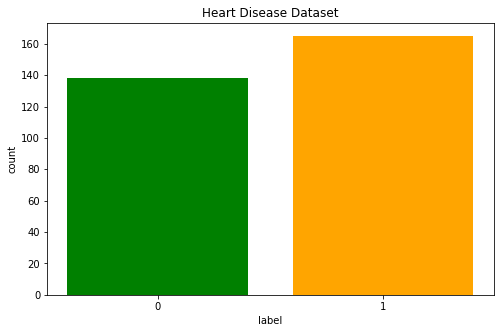

In [62]:
x = list(count.keys())
y = list(count.values())
fig = plt.figure(figsize = (8, 5))
plt.bar(x, y, color=["orange", "green"])
plt.xticks(range(len(x)))
plt.xlabel("label")
plt.ylabel("count")
plt.title("Heart Disease Dataset")
plt.show()

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


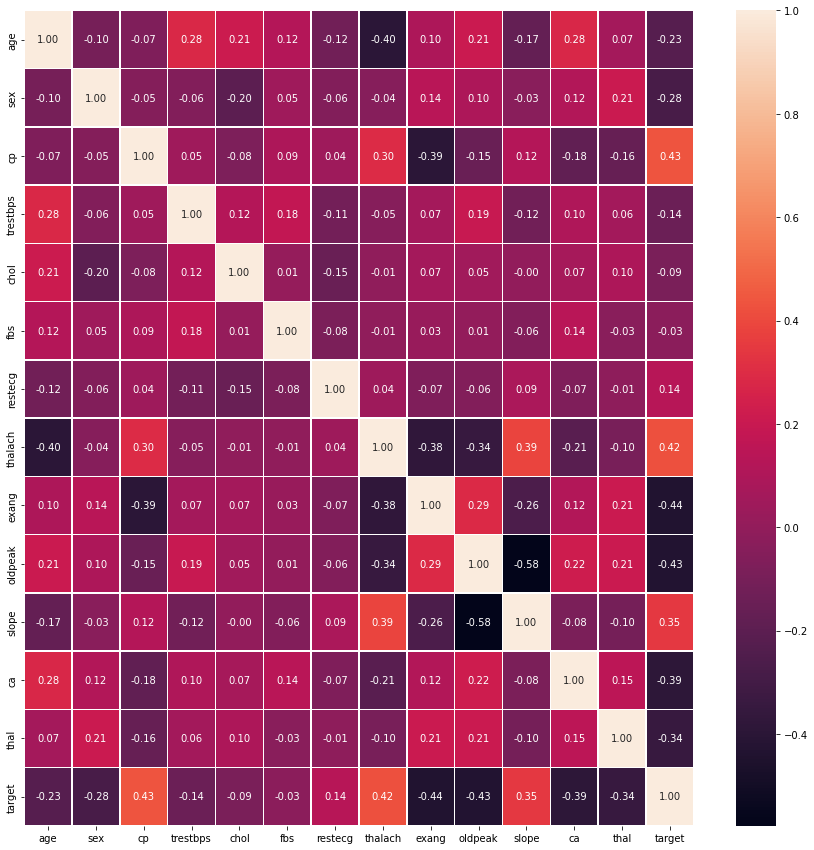

In [64]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f")

In [65]:
corr_target = dict(df.drop('target', axis=1).corrwith(df.target))
corr_target

{'age': -0.22543871587483727,
 'ca': -0.3917239923512519,
 'chol': -0.08523910513756902,
 'cp': 0.4337982615068933,
 'exang': -0.4367570833533018,
 'fbs': -0.028045760272712827,
 'oldpeak': -0.4306960016873683,
 'restecg': 0.13722950287377336,
 'sex': -0.28093657550176654,
 'slope': 0.34587707824172526,
 'thal': -0.34402926803830985,
 'thalach': 0.42174093381067435,
 'trestbps': -0.14493112849775144}

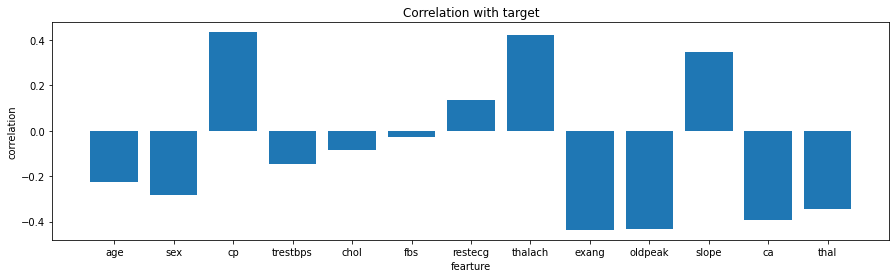

In [66]:
x = list(corr_target.keys())
y = list(corr_target.values())
fig = plt.figure(figsize = (15, 4))
plt.bar(x, y)
plt.xticks(range(len(x)))
plt.xlabel("fearture")
plt.ylabel("correlation")
plt.title("Correlation with target")
plt.show()

In [67]:
columns = df.columns
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")

age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex : [1 0]
cp : [3 2 1 0]
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs :

In [68]:
labels = df["target"]
data = df
labels

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [69]:
df.drop("target",axis=1, inplace=True)

In [70]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [71]:
df = pd.get_dummies(df, columns = ["sex","cp","fbs","restecg","exang","slope","ca","thal"])
df.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0


In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']] = scaler.fit_transform(df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])
df.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0


In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.25, random_state=42, stratify = np.array(labels))

In [74]:
len(X_train),len(X_test)

(227, 76)

In [75]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [76]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def Evaluate(clf, X_test, y_test):
    y_pred = clf.predict(X_test)
    clf_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))      
    print(f"Accuracy : {accuracy_score(y_test, y_pred) * 100:.2f}%")
    print()
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    print()
    confusion_matrix_ = confusion_matrix(y_test, y_pred)
    ax = plt.subplot()
    sns.heatmap(confusion_matrix_, annot = True, ax = ax, fmt = "g")
    ax.set_xlabel("Predicted labels")
    ax.set_ylabel("True labels")
    plt.show()

Accuracy : 78.95%

CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.806452   0.777778  0.789474   0.792115      0.790983
recall      0.714286   0.853659  0.789474   0.783972      0.789474
f1-score    0.757576   0.813953  0.789474   0.785765      0.787990
support    35.000000  41.000000  0.789474  76.000000     76.000000



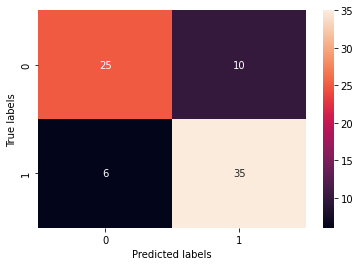

In [77]:
Evaluate(clf, X_test, y_test)

In [78]:
test_score = accuracy_score(y_test, clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,88.105727,78.947368


In [79]:
test = {}
for i in columns[:-1]:
  test[i] = [float(input(f"Enter value for {i} : "))]
df1 = pd.DataFrame(test)
df = pd.concat([df1, data], ignore_index=True)
df = pd.get_dummies(df, columns = ["sex","cp","fbs","restecg","exang","slope","ca","thal"])
df = df.iloc[0:1]
df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']] = scaler.transform(df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])
y_pred = clf.predict(df)
print("Prediction :",int(y_pred[0]))

Enter value for age : 67
Enter value for sex : 1
Enter value for cp : 0
Enter value for trestbps : 160
Enter value for chol : 286
Enter value for fbs : 0
Enter value for restecg : 0
Enter value for thalach : 108
Enter value for exang : 1
Enter value for oldpeak : 1.5
Enter value for slope : 1
Enter value for ca : 3
Enter value for thal : 2
Prediction : 0
